In [14]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

# Objectives

In this note book, I am testing basic Nested sampling Module.
 - import Nested_Sampling as NEST
 
  - Using the same exercise in the notebook : Test_NS_with_simple_Gaussian1.0
  - Only showing the plots : 
        -Acceptance Ratio
        -LogL vs LogX
        -Posterior Weights vs LogX

In [15]:
########################Import Modules##########################################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import corner
import copy as duplicate
import time
from matplotlib import colors
import scipy as sp

####Import test mcmc module

import Metropolis_Hasting as MCMC
import Nested_Sampling as NEST

#####################################################################################
from ipywidgets import IntProgress
from IPython.display import display

from mpl_toolkits.axes_grid1 import make_axes_locatable

from matplotlib.patches import Ellipse
from matplotlib.collections import PatchCollection

#####################################

# Likelihood

TODO: I define a Gaussian log-likelihood function given by;

$$\log{L} = {\log{(\frac{1}{\sqrt{2\pi\sigma^{2}}}})}  {-\frac{(\mu_{0} - \mu)^{2}}{2\sigma^{2}}}$$

In [16]:
def Likelihood(mu,*args):
    
    """Simple gaussian Likelihood
    
    Parameters
    --------------
    mu_true : scalar
            True mean value
    mu     : scalar
            sampled mu
    
    *args : list
            Likelihood extra arguments
    """
    
    mu_value = args[0]
    
    L = (1/np.sqrt(2*np.pi)*np.exp(-(mu_value-mu)**2))
    
    return np.log(L)

In [17]:
def generate():
    """Generate uniform y values between 0,10"""
    mu = sp.stats.uniform.rvs(0,10)
    
    return mu

# Prior on $\mu$
TODO : Define function of prior on $\mu$

The prior on $\mu$ is a flat prior.
                
$$P(\mu) = \frac{1}{\mu_{upper}-\mu_{lower}}$$

In [18]:
def Prior(mu,*args):
    
    
    """Evaluate the prior probability of mu
    
    Parameters
    
    ----------------
    
    mu : scalar
            mean
            
    mu_limits: list or array 
            The limits of mu
            
    *args : list
            prior extra arguments
    
    ----------------
     output: scalar
            The log Prior of mu.
    
    """
    
    mulimits = args[0]
    #If position is out of limits discard 
    if (mu < mulimits[0]) | (mu > mulimits[1]):  
        mu_prior = -np.inf
    else:
        mu_prior = 1.0/(mulimits[1] - mulimits[0])
    
    return np.log(mu_prior)

In [19]:
# Useful function #Compute the log of the sum of exponentials of input elements.
# OR from scipy.misc import logsumexp 

def logsumexp(values):
    biggest = np.max(values)
    x = values - biggest
    result = np.log(np.sum(np.exp(x))) + biggest
    return result


## Simple Gaussian function with $\mu$ = 5 and $\sigma$ = 1

Text(0.5,0,'$\\mu$')

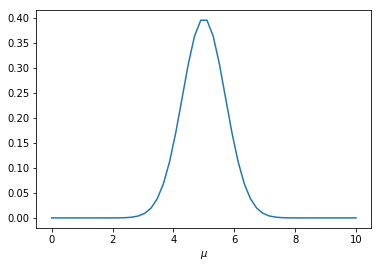

In [20]:
x_vals = np.linspace(0,10)
y_vals = (1/np.sqrt(2*np.pi))*np.exp(-(x_vals-5)**2)

plt.plot(x_vals,y_vals)
plt.xlabel('$\mu$')

# Generate walkers

In [21]:
# Generate walkers
N = 400
particles = []

#LIMITS of mu
mulimits = np.array([0,10])
mu_value = 5

logl = np.empty(N)
logp = np.empty(N)

for i in range(0, N):
    mu_val = generate()
    particles.append(mu_val)
    logl[i] = Likelihood(mu_val,mu_value) 
    logp[i] = Prior(mu_val,mulimits)

In [22]:
# Number of NS iterations
nest_steps = 6000

# MCMC steps per NS iteration
mcmc_steps = 70

# mcmc stepsize
mustep = 0.1
stepsize = np.array([mustep])

#Number of parameters
num_params = 1


#Likelihood function arguments
args_like = [mu_value]

#Prior function arguments
args_prior = [mulimits]

In [23]:
#Exploratiion function is the technique used to generate a new sample within nested sampling
#In my case i use mcmc

#MCMC predefined in nested sampling module for now
Exploration_function = None   

#Exporation function Arguments
Exploration_args = [Likelihood,args_like,Prior,args_prior,stepsize,mcmc_steps]



### Testing the Module by reproducing the same plots produced in the Test_NS_with_simple_Gaussian1.0 Notebook

# Main Nest

0.0

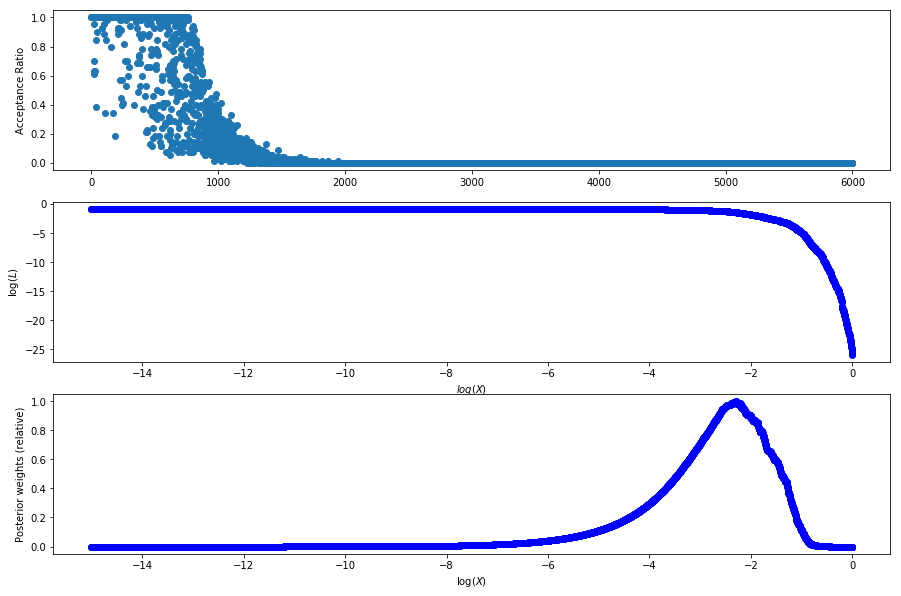

In [24]:
NEST.Nested_Sampling(nest_steps,particles,logl,logp,Exploration_function,Exploration_args)